In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'King 11'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [6]:
lit.link_bibcode.unique()

array(['2018A&A...618A..93C'], dtype=object)

In [7]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,0,2211121834828358528,3,NaN,1636148068921376768,Gaia DR3 2211121834828358528,2211121834828358528,1161687180,2016.0,-3.222717,...,3.582699,2.248619,1.330393,0.858373,0.612384,0.015728,2.524399,0.440766,0.117419,0.68
1,1,2211122045287064320,3,NaN,1636148068921376768,Gaia DR3 2211122045287064320,2211122045287064320,349538297,2016.0,-3.193050,...,3.602076,2.260780,1.337588,0.863015,1.110911,0.003310,0.247588,0.166621,0.158199,1.00
2,2,2211122045287373312,3,NaN,1636148068921376768,Gaia DR3 2211122045287373312,2211122045287373312,1377041690,2016.0,-3.188447,...,3.602076,2.260780,1.337588,0.863015,1.131225,0.002166,-0.324878,0.137461,0.157659,1.00
3,3,2211122182726015232,3,NaN,1636148068921376768,Gaia DR3 2211122182726015232,2211122182726015232,1758264312,2016.0,-3.114499,...,3.406311,2.137912,1.264893,0.816112,1.039132,0.002248,-0.070783,0.142924,0.143648,1.00
4,5,2211122251445487360,3,NaN,1636148068921376768,Gaia DR3 2211122251445487360,2211122251445487360,1339860886,2016.0,-3.128856,...,3.406311,2.137912,1.264893,0.816112,1.072429,0.002256,-0.138851,0.154876,0.145677,1.00


In [8]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [9]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

Series([], Name: link_bibcode, dtype: int64)

In [10]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

In [11]:
found.occurences.value_counts()

1.00    33
0.98     5
0.90     5
0.68     4
0.86     4
0.66     3
0.91     3
0.70     3
0.96     3
0.72     3
0.92     2
0.44     2
0.67     2
0.88     2
0.85     2
0.83     2
0.80     2
0.95     2
0.76     2
0.65     2
0.97     2
0.69     1
0.39     1
0.50     1
0.63     1
0.77     1
0.51     1
0.73     1
0.52     1
0.87     1
0.99     1
0.84     1
0.82     1
0.79     1
0.71     1
0.57     1
0.75     1
0.55     1
0.78     1
0.81     1
0.94     1
0.93     1
0.30     1
Name: occurences, dtype: int64

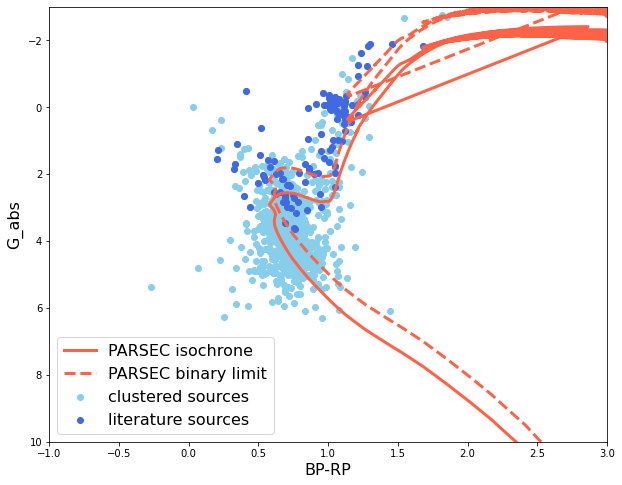

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [13]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

0 literature sources were not clustered.


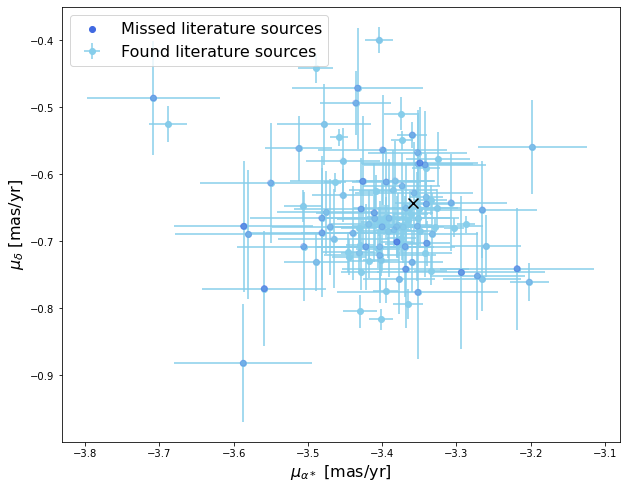

In [15]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.scatter(not_found.pmra, not_found.pmdec, alpha=1-not_found.occurences, color='royalblue', zorder=1,
             label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;